In [1]:
from data_loader import ObjectSegmentationDataset, weak_augment, denormalize, strong_augment, normalize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
ds = ObjectSegmentationDataset(r"D:\Datasets\dino_seg\train")
dl = DataLoader(ds, batch_size=4)
batch = next(iter(dl))
images, masks = batch

In [2]:
def show_batch(images, masks):
    masked = images*masks
    for n, im in enumerate(masked):
        plt.subplot(121)
        plt.imshow(images[n].permute((1,2,0)))
        plt.subplot(122)
        plt.imshow(im.permute((1,2,0)))
        plt.show()

# WEAK 

In [3]:
masks.mean(dim=(2,3))

tensor([[0.3545],
        [0.4711],
        [0.1472],
        [0.2356]])

In [4]:
images_aug, masks_aug = weak_augment(images, masks)
images_aug = denormalize(images_aug)

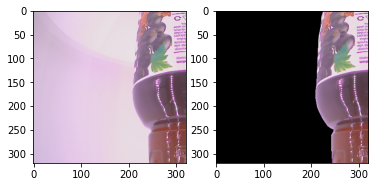

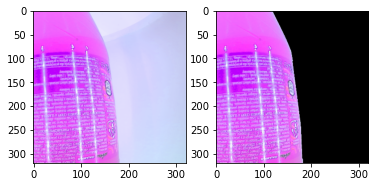

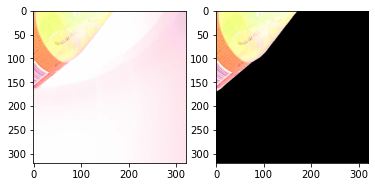

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


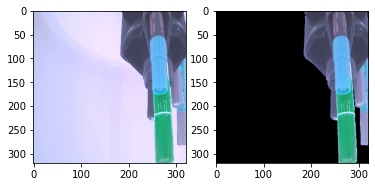

In [5]:
show_batch(images_aug, masks_aug)

# STRONG

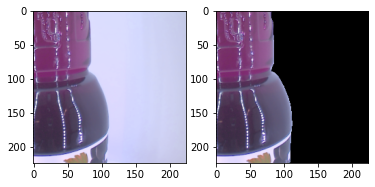

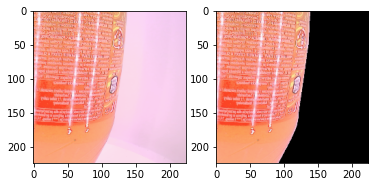

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


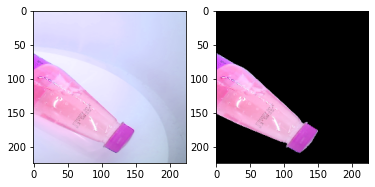

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


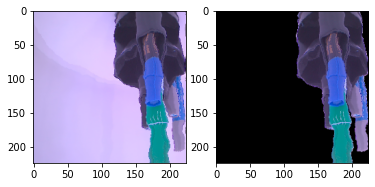

In [6]:
images_aug, masks_aug = strong_augment(images, masks)
images_aug = denormalize(images_aug)
show_batch(images_aug, masks_aug)

# Wczytamy sobie model

In [7]:
import model
import torch
from custom_activations import HardELU
seg = model.Segmentator(activation_function=HardELU)
seg.load_state_dict(torch.load(r"D:/Modele/fg_segmentator/14-06-21_12-20/best.pth"))

RuntimeError: Error(s) in loading state_dict for Segmentator:
	Missing key(s) in state_dict: "layers.13.conv.0.0.weight", "layers.13.conv.0.1.weight", "layers.13.conv.0.1.bias", "layers.13.conv.0.1.running_mean", "layers.13.conv.0.1.running_var", "layers.13.conv.0.2.a", "layers.13.conv.1.0.weight", "layers.13.conv.1.1.weight", "layers.13.conv.1.1.bias", "layers.13.conv.1.1.running_mean", "layers.13.conv.1.1.running_var", "layers.13.conv.1.2.a", "layers.13.conv.2.weight", "layers.13.conv.2.bias", "layers.14.conv.0.0.weight", "layers.14.conv.0.1.weight", "layers.14.conv.0.1.bias", "layers.14.conv.0.1.running_mean", "layers.14.conv.0.1.running_var", "layers.14.conv.0.2.a", "layers.14.conv.1.0.weight", "layers.14.conv.1.1.weight", "layers.14.conv.1.1.bias", "layers.14.conv.1.1.running_mean", "layers.14.conv.1.1.running_var", "layers.14.conv.1.2.a", "layers.14.conv.2.weight", "layers.14.conv.2.bias". 
	size mismatch for layers.12.conv.2.weight: copying a param with shape torch.Size([1, 1920, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 1920, 1, 1]).
	size mismatch for layers.12.conv.2.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([32]).

In [ ]:
out = seg(normalize(images))

In [ ]:
out.shape

torch.Size([4, 1, 1000, 1000])

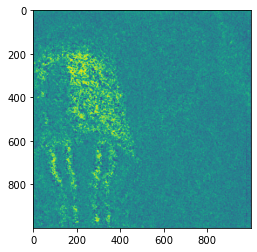

In [ ]:
plt.imshow(out[0,0].detach().numpy())
plt.show()